# ANOVA (one-way)

In [1]:
## Vamos a establecer el directorio
setwd("/home/jovyan/work/anova/02/demos/datasets")

In [2]:
library(ggplot2)
theme_set(theme_gray(base_size = 25))
library(car)

Loading required package: carData



In [3]:
options(repr.plot.width=12, repr.plot.height=8)

#### Obtenido de https://www.kaggle.com/gauravgulati9c/zomato-eda-indian-restaurants-updated/data

In [4]:
zomato <- read.csv('zomato.csv')

In [5]:
colnames(zomato)

[1] "Restaurant.ID"        "Restaurant.Name"      "Country.Code"        
 [4] "City"                 "Address"              "Locality"            
 [7] "Locality.Verbose"     "Longitude"            "Latitude"            
[10] "Cuisines"             "Average.Cost.for.two" "Currency"            
[13] "Has.Table.booking"    "Has.Online.delivery"  "Is.delivering.now"   
[16] "Switch.to.order.menu" "Price.range"          "Aggregate.rating"    
[19] "Rating.color"         "Rating.text"          "Votes"

### Utilizaremos solamente 3 columnas para el análisis de la varianza

Veremos si hay una diferencia en el Rating de los restaurantes para los diferentes rangos de precio. Y veremos si esta diferencia es significativa

In [6]:
zomato <- zomato[,c('Price.range','Aggregate.rating','Votes')]
head(zomato)

,Price.range,Aggregate.rating,Votes
,<int>,<dbl>,<int>
1,3,4.8,314
2,3,4.5,591
3,4,4.4,270
4,4,4.9,365
5,4,4.8,229
6,3,4.4,336


In [7]:
colSums(is.na(zomato))

Price.range Aggregate.rating            Votes 
               0                0                0

In [8]:
dim(zomato)

[1] 9551    3

# La pruba Shapiro solamente funciona para menos de 5000 filas, obtendremos 4000 de manera aleatoria

In [9]:
zomato <- zomato[sample(nrow(zomato),4000),]
dim(zomato)

[1] 4000    3

In [10]:
str(zomato)

'data.frame':	4000 obs. of  3 variables:
 $ Price.range     : int  1 1 1 3 2 4 2 1 1 4 ...
 $ Aggregate.rating: num  3.1 3.4 2.8 3.2 3.4 2.4 3.3 2.8 0 4.2 ...
 $ Votes           : int  26 16 55 88 35 103 11 8 3 327 ...


In [11]:
table(zomato$Price.range)


   1    2    3    4 
1847 1314  573  266 

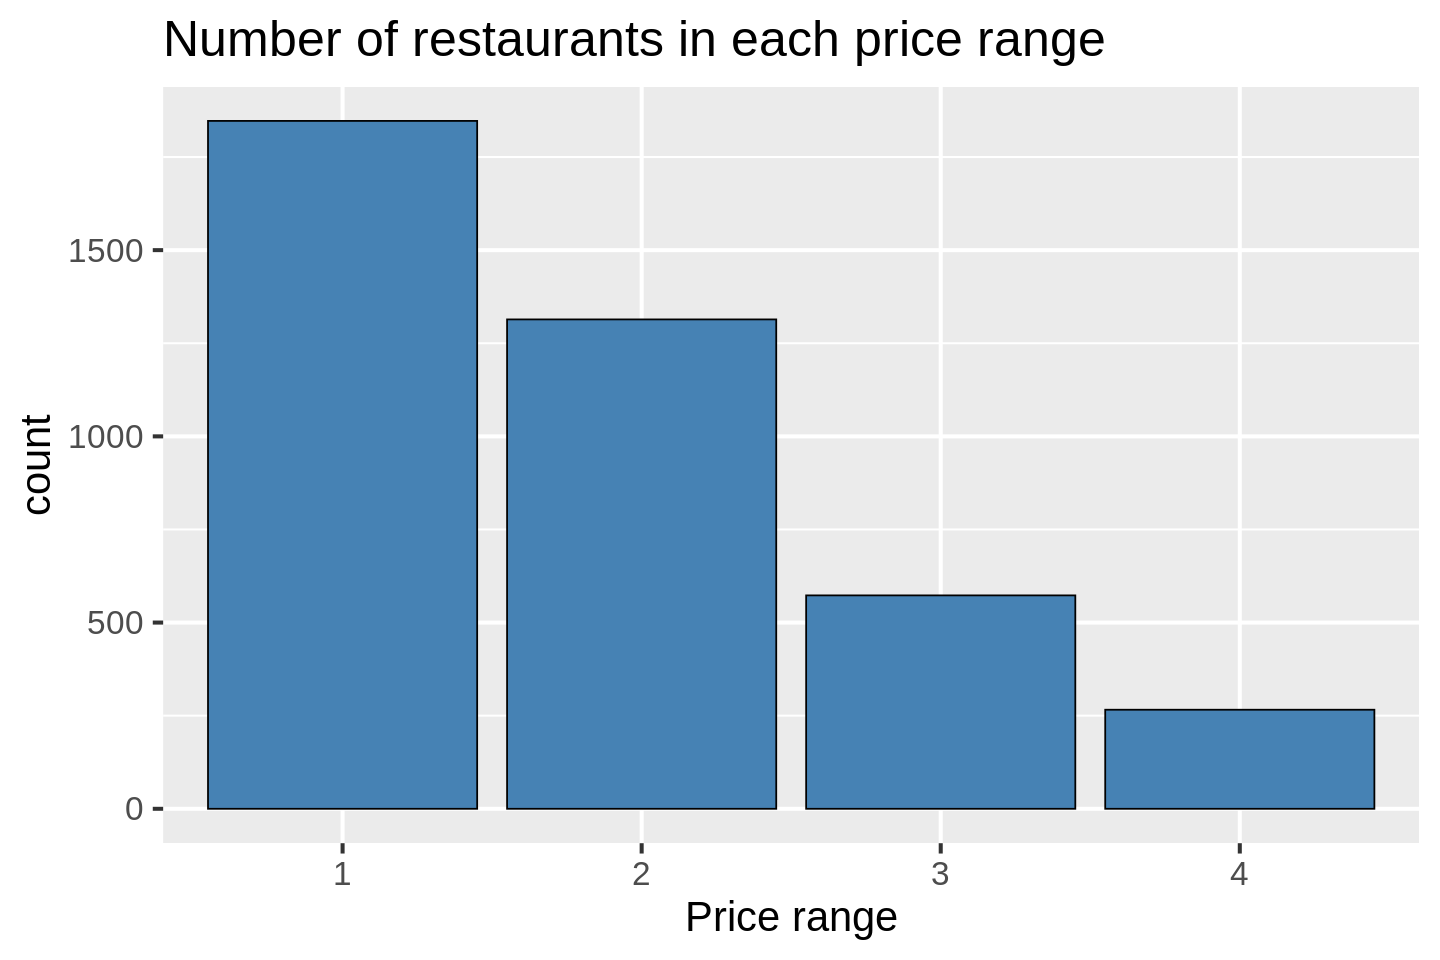

In [12]:
ggplot(data = zomato,
      aes(factor(x = Price.range))) + 
      geom_bar(col = 'black', fill = 'steelblue') +
      ggtitle('Number of restaurants in each price range') +
      xlab('Price range') +
      ylab('count')

In [13]:
summary(zomato$Aggregate.rating)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   2.500   3.200   2.675   3.700   4.900 

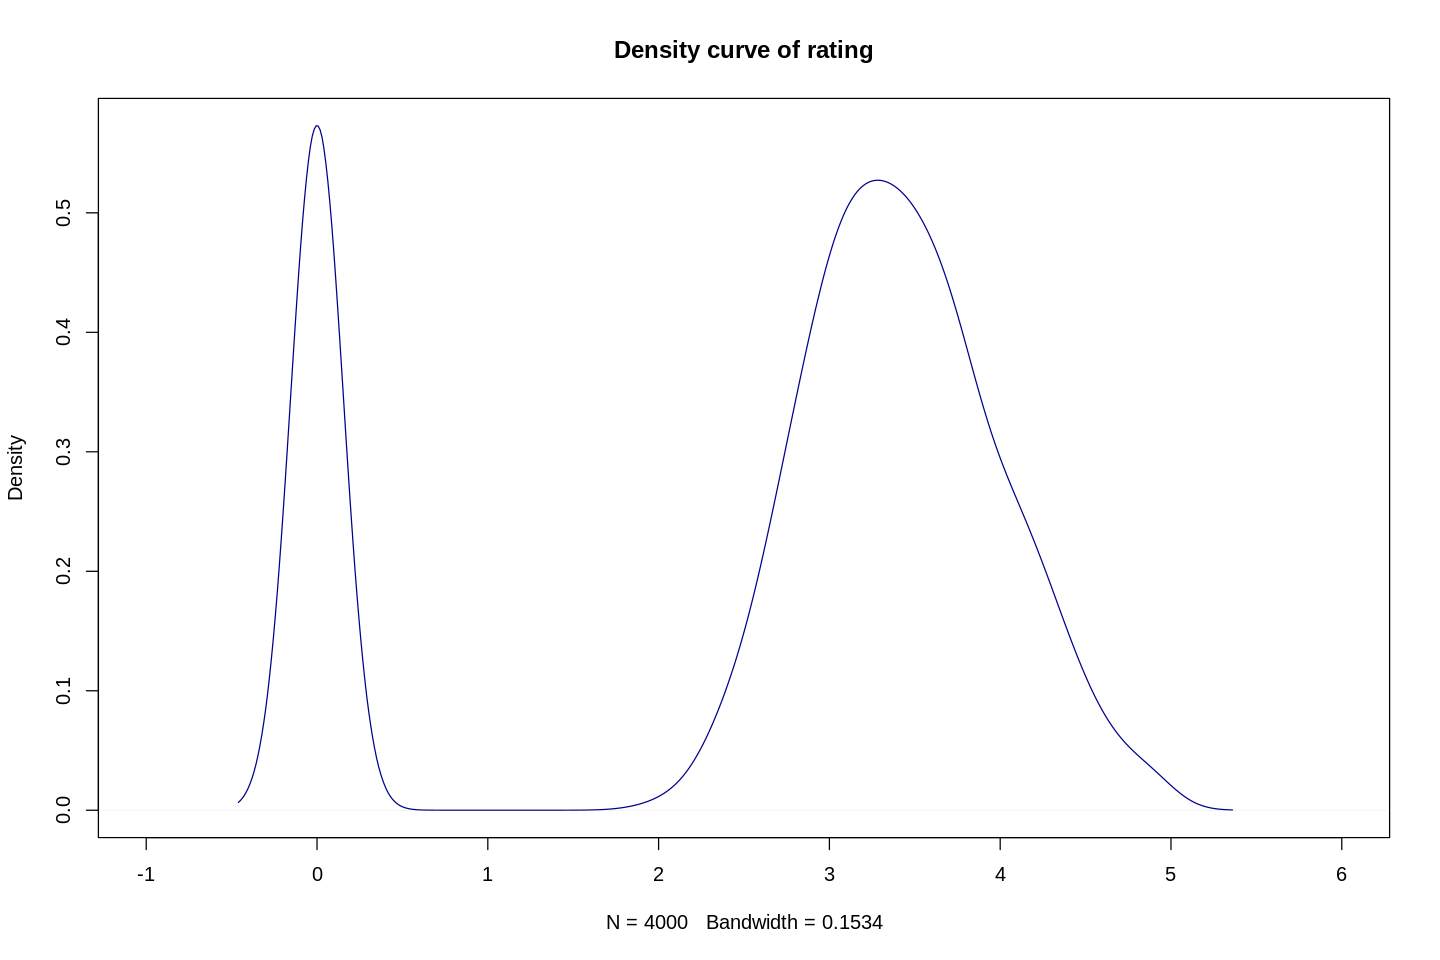

In [14]:
plot(density(zomato$Aggregate.rating), col = 'darkblue',
    main = 'Density curve of rating', xlim=c(-1,6))

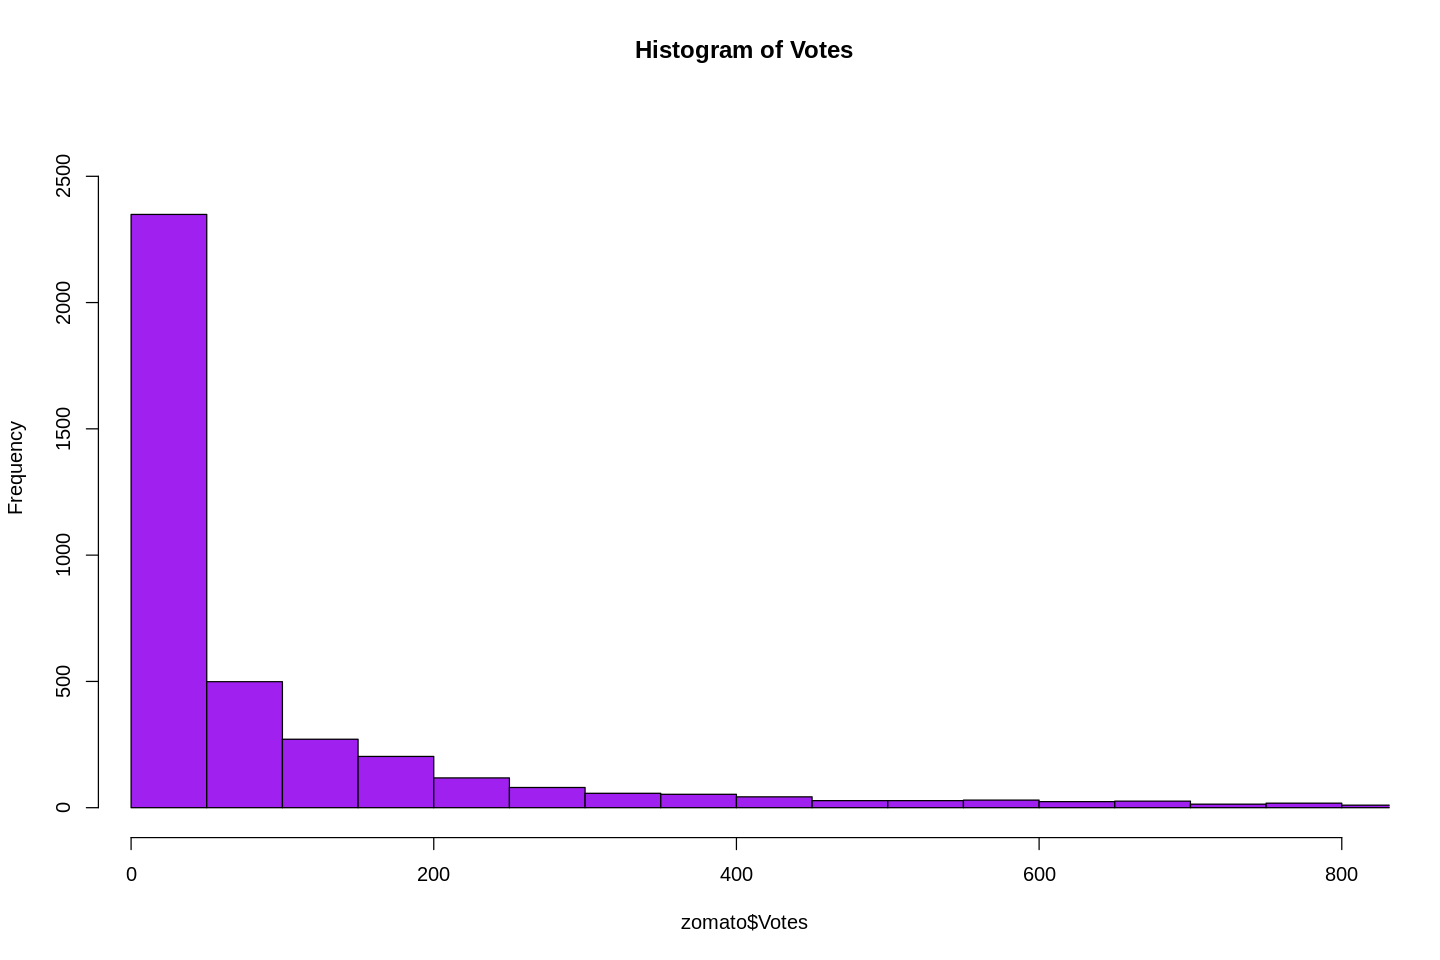

In [15]:
hist(zomato$Votes, breaks=200, col="purple",
    main = 'Histogram of Votes',
    xlim=c(10,800), ylim=c(-10,2700))

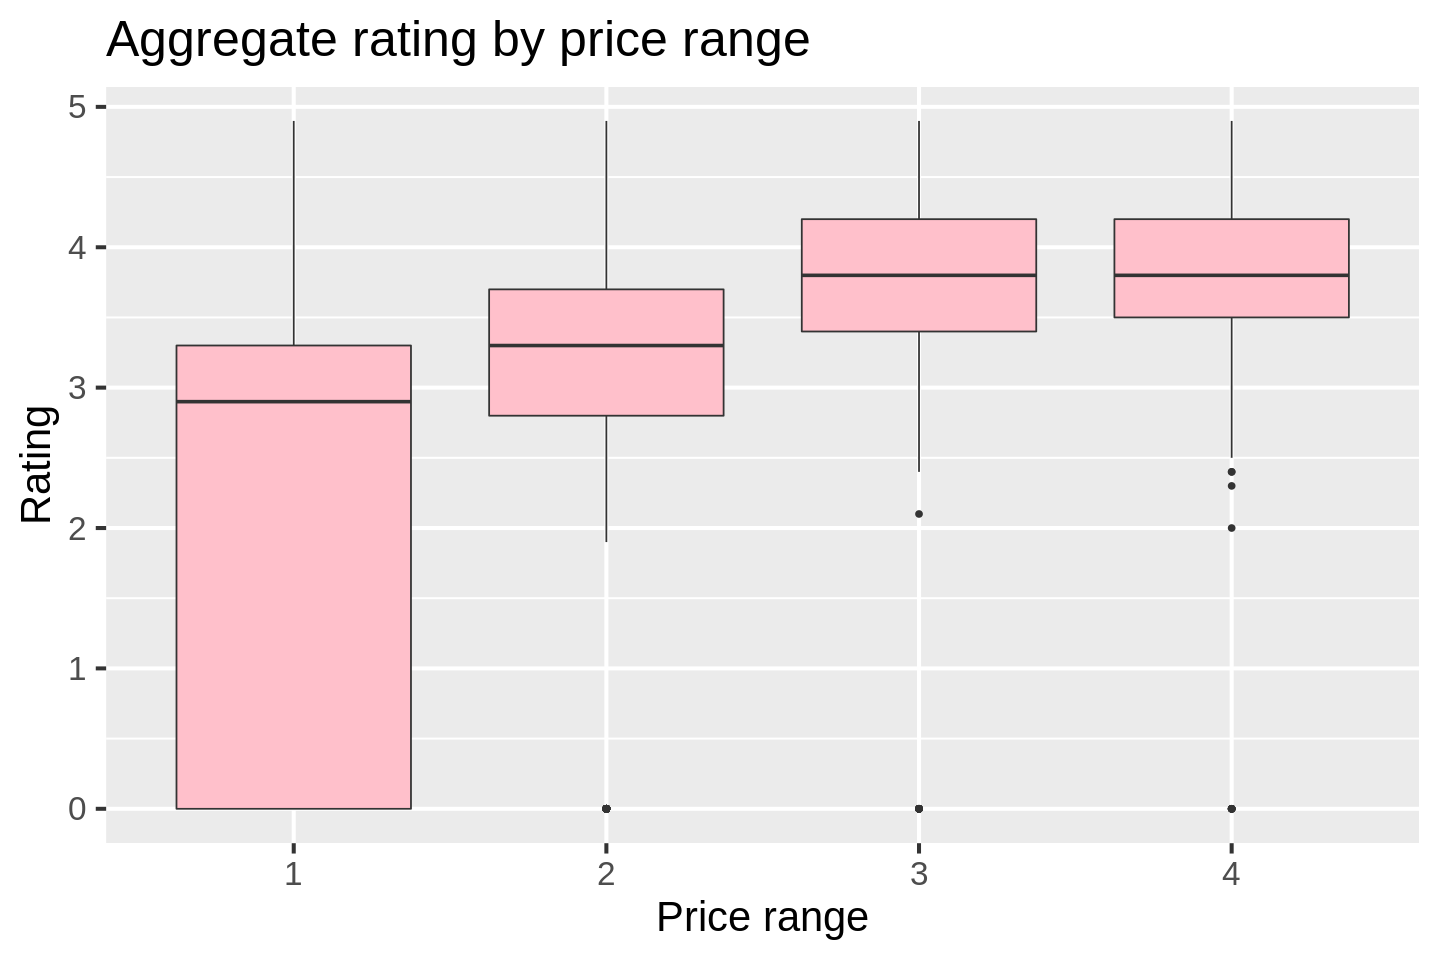

In [16]:
qplot(factor(x = Price.range), y = Aggregate.rating,
     geom = 'boxplot',
     main = 'Aggregate rating by price range',
     data = zomato,
     xlab = 'Price range',
     ylab = 'Rating',
     fill = I('pink')
     )

In [17]:
anova_test <- aov(zomato$Aggregate.rating ~ factor(zomato$Price.range), data = zomato)
summary(anova_test)

                             Df Sum Sq Mean Sq F value Pr(>F)    
factor(zomato$Price.range)    3   1758   586.1   320.5 <2e-16 ***
Residuals                  3996   7307     1.8                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

#### Debido a que obtuvimos un valor P $2 \times 10^{-16}$ y un estadístico F 330. Esto nos prueba que hay una diferencia entre los diferentes grupos a un nivel de significancia del 5% ( on incluso a un nivel muchísimo menor)

Esto solo nos dice que los Ratings son distintos, pero no cuales son los más significativamente distintos entre si

## Tukey Honestly Significance Difference Test

Usaremos la prueba Tukey HSD para encontrar medias que son significativamente distintas entre categorias

In [18]:
TukeyHSD(anova_test)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = zomato$Aggregate.rating ~ factor(zomato$Price.range), data = zomato)

$`factor(zomato$Price.range)`
          diff        lwr       upr     p adj
2-1 0.92243632  0.7970068 1.0478658 0.0000000
3-1 1.66332820  1.4971342 1.8295222 0.0000000
4-1 1.69800652  1.4700805 1.9259326 0.0000000
3-2 0.74089189  0.5668998 0.9148840 0.0000000
4-2 0.77557020  0.5418972 1.0092432 0.0000000
4-3 0.03467832 -0.2231801 0.2925368 0.9858128


## Aquí podemos ver por pares de categorías las diferencias, como tenemos un valor P de casi cero, tenemos grandes diferencias entre 2-1, 3-1, 4-1, 3-2, 4-2.  Sin embargo no hay una gran diferencia entre las categorias 4-3

# Revisando las suposiciones

Los residuos se distribuyen normalmente

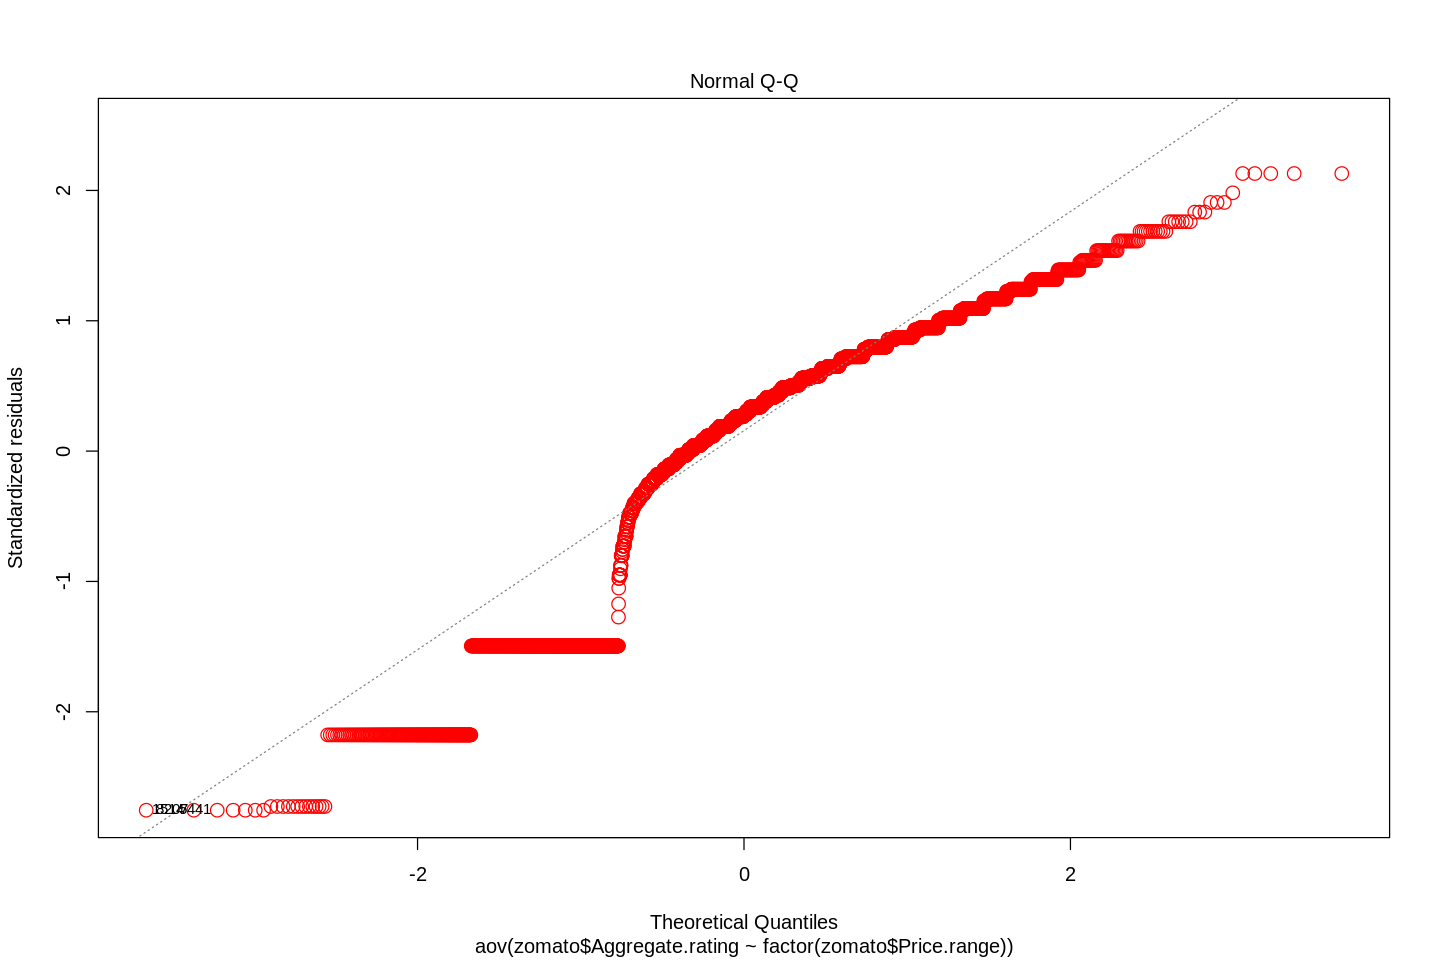

In [19]:
plot(anova_test, 2, col = "red", cex = 1.5)

Podemos ver utilizando como en una gráfica Q-Q (donde la normal es la línea recta), nuestros residuales no siguen esta línea

In [20]:
aov_residuals <- residuals(object = anova_test)


### Usuando la prueba de normalidad de Shapiro, podemos ver que el valor p es mucho menor que el valor límite de 0.05, por lo que se acepta la hipótesis alternativa de no normalidad

In [21]:
shapiro.test(x = aov_residuals)


	Shapiro-Wilk normality test

data:  aov_residuals
W = 0.90065, p-value < 2.2e-16


### Usando la prueba de levene para revisar si las diferentes Ratings tienen la misma varianza. Pero vemos que no se cumple esta suposición al obtener un valor P casi 0 en donde se debe aceptar la hipótesis alternativa de que las varianzas entre las categorias son distintas

In [22]:
levene_test <- leveneTest(zomato$Aggregate.rating ~ factor(zomato$Price.range), data = zomato)
levene_test

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,3,143.1089,4.428024e-88
,3996,NA,NA


### Debemos entonces buscar otra alternativa a ANOVA, usaremos la prueba Welch (one-way) que no hace la suposición de la igualdad entre las varianzas

In [23]:
oneway.test(zomato$Aggregate.rating ~ factor(zomato$Price.range), data = zomato)


	One-way analysis of means (not assuming equal variances)

data:  zomato$Aggregate.rating and factor(zomato$Price.range)
F = 434.68, num df = 3, denom df = 1166, p-value < 2.2e-16


#### Al realizar esta prueba podemos observar como obtenemos un valor p muy cercano a 0 con lo que podemos aceptar la hipótesis alternativa de que hay diferncia entre los ratings de los restaurantes a diferentes precios. Similar a nuestro ANOVA

In [24]:
pairwise.t.test(zomato$Aggregate.rating, zomato$Price.range,
               p.adjust.method = "BH", pool.sd =FALSE)


	Pairwise comparisons using t tests with non-pooled SD 

data:  zomato$Aggregate.rating and zomato$Price.range 

  1      2      3   
2 <2e-16 -      -   
3 <2e-16 <2e-16 -   
4 <2e-16 <2e-16 0.56

P value adjustment method: BH 

Podemos ver que esta prueba nos arroja lo mismo, hay una diferencia significativa entre los ratings para los restaurantes en diferentes rangos de precios

### Debido a que falló nuestra suposición de normalidad, podemos aplicar la prueba Kruskal-Wallis que no asume residuales distribuidos normalmente pero si asume muestras idénticas y escaladas

In [25]:
kruskal.test(zomato$Votes, zomato$Price.range, data =zomato)


	Kruskal-Wallis rank sum test

data:  zomato$Votes and zomato$Price.range
Kruskal-Wallis chi-squared = 1180.4, df = 3, p-value < 2.2e-16


### Nuevamente nos confirma que existe una diferencia significativa entre las categorias al obtener un valor p muy cercano a cero, debemos aceptar la hipótesis alternativa de que si existe diferencia entre los ratings para los diferentes rangos de precios

# ANOVA ( two-way)

In [26]:
birthweight <- read.csv('dataset-34016.csv')
head(birthweight)

,low,age,lwt,race,smoke,ptl,ht,ui,ftv,bwt
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,0,19,182,2,0,0,0,1,0,2523
2,0,33,155,3,0,0,0,0,3,2551
3,0,20,105,1,1,0,0,0,1,2557
4,0,21,108,1,1,0,0,1,2,2594
5,0,18,107,1,1,0,0,1,0,2600
6,0,21,124,3,0,0,0,0,0,2622


In [27]:
colnames(birthweight) <-c("birthwt.below.2500",
                        "mother.age",
                        "mother.weight",
                        "ethnicity",
                        "mother.smokes",
                        "previous.prem",
                        "hypertension",
                        "uterine.irr",
                        "physician.visits",
                        "birthwt.grams")

In [28]:
head(birthweight)

,birthwt.below.2500,mother.age,mother.weight,ethnicity,mother.smokes,previous.prem,hypertension,uterine.irr,physician.visits,birthwt.grams
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,0,19,182,2,0,0,0,1,0,2523
2,0,33,155,3,0,0,0,0,3,2551
3,0,20,105,1,1,0,0,0,1,2557
4,0,21,108,1,1,0,0,1,2,2594
5,0,18,107,1,1,0,0,1,0,2600
6,0,21,124,3,0,0,0,0,0,2622


In [29]:
birthweight <- birthweight[,c('mother.smokes','ethnicity',
                              'hypertension','physician.visits','birthwt.grams')]
head(birthweight)

,mother.smokes,ethnicity,hypertension,physician.visits,birthwt.grams
,<int>,<int>,<int>,<int>,<int>
1,0,2,0,0,2523
2,0,3,0,3,2551
3,1,1,0,1,2557
4,1,1,0,2,2594
5,1,1,0,0,2600
6,0,3,0,0,2622


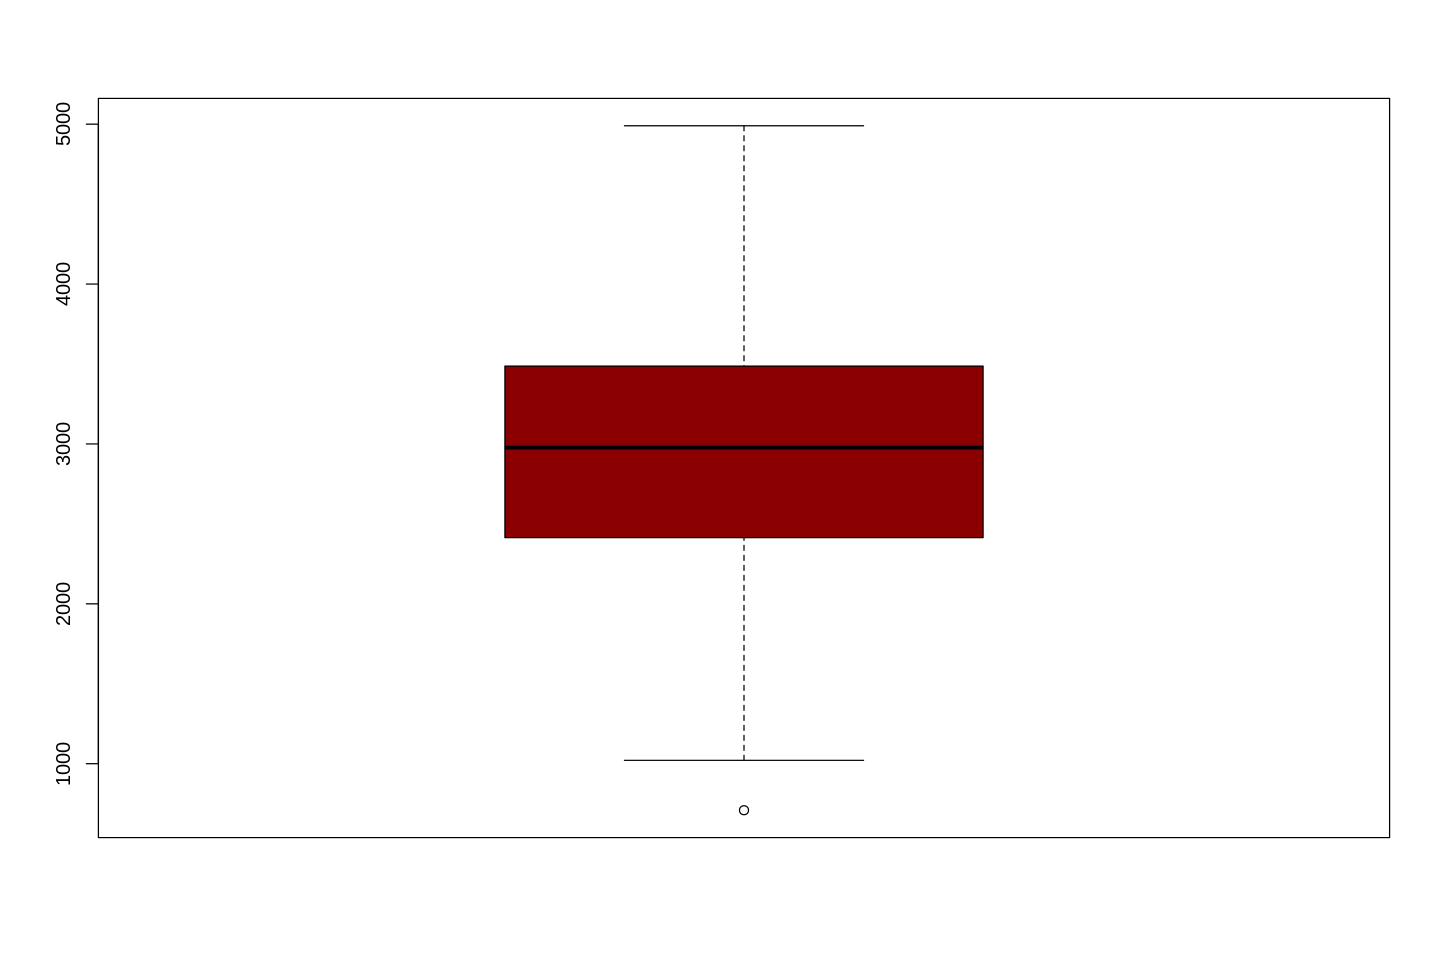

In [30]:
boxplot(birthweight$birthwt.grams, col='darkred')

In [31]:
str(birthweight)

'data.frame':	189 obs. of  5 variables:
 $ mother.smokes   : int  0 0 1 1 1 0 0 0 1 1 ...
 $ ethnicity       : int  2 3 1 1 1 3 1 3 1 1 ...
 $ hypertension    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ physician.visits: int  0 3 1 2 0 0 1 1 1 0 ...
 $ birthwt.grams   : int  2523 2551 2557 2594 2600 2622 2637 2637 2663 2665 ...


In [32]:
table(birthweight$mother.smokes)


  0   1 
115  74 

In [33]:
table(birthweight$ethnicity)


 1  2  3 
96 26 67 

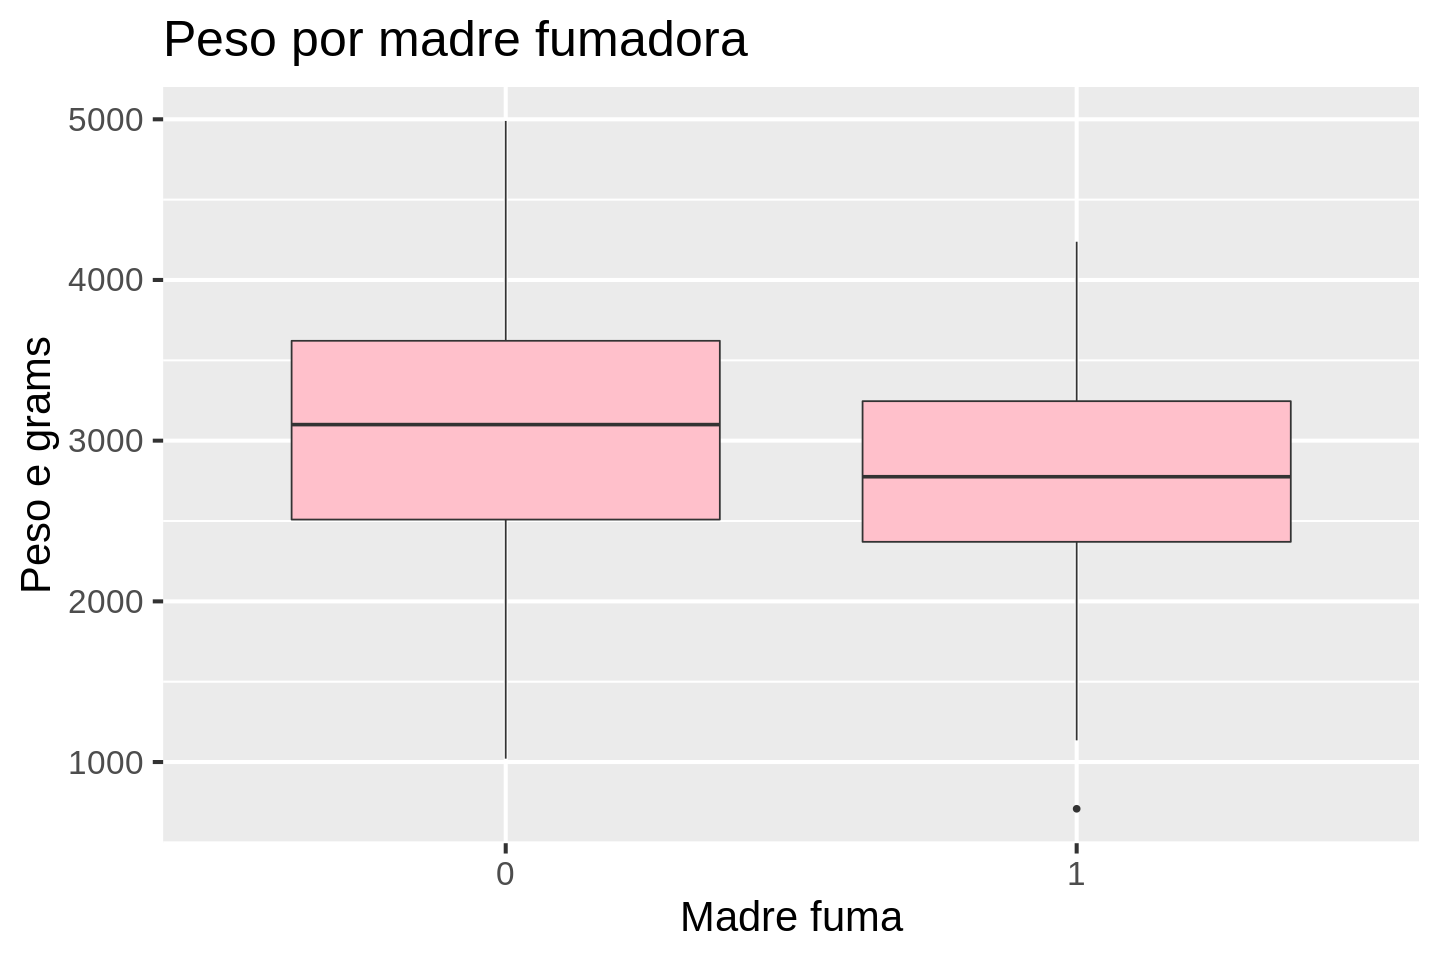

In [34]:
qplot(factor(x=mother.smokes), y=birthwt.grams,
     geom = 'boxplot',
     main = 'Peso por madre fumadora',
     data = birthweight,
     xlab = 'Madre fuma',
     ylab = 'Peso e grams',
     fill = I('pink'))  

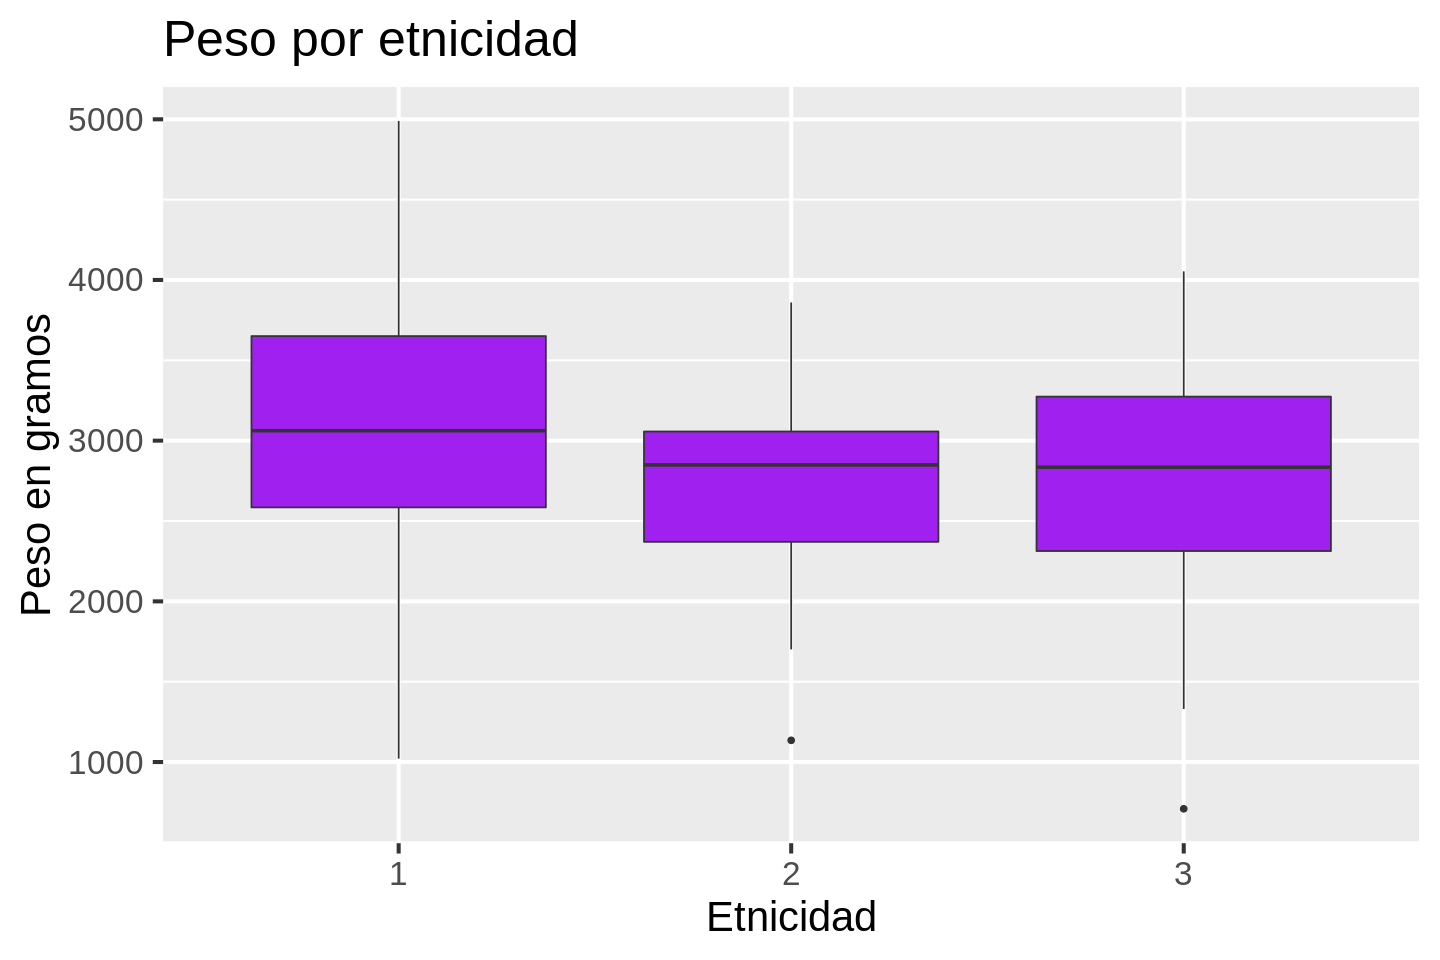

In [35]:
qplot(factor(x=ethnicity), y=birthwt.grams,
     geom = 'boxplot',
     main = 'Peso por etnicidad',
     data = birthweight,
     xlab = 'Etnicidad',
     ylab = 'Peso en gramos',
     fill = I('purple')) 

## Usaremos ANOVA para ver si el hecho de que la made es fumadora y la etnicidad afectan al peso del niño

In [36]:
twoWay_anova_no_interaction <- aov(birthwt.grams ~ factor(mother.smokes) + factor(ethnicity),data = birthweight)
summary(twoWay_anova_no_interaction)

                       Df   Sum Sq Mean Sq F value   Pr(>F)    
factor(mother.smokes)   1  3625946 3625946   7.655 0.006237 ** 
factor(ethnicity)       2  8712354 4356177   9.196 0.000156 ***
Residuals             185 87631356  473683                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

## Ambos factores son significativos a un nivel de significancia del 5%

In [37]:
twoWay_anova_interaction <- aov(birthwt.grams ~ factor(mother.smokes) * factor(ethnicity),data = birthweight)
summary(twoWay_anova_interaction)

                                         Df   Sum Sq Mean Sq F value  Pr(>F)
factor(mother.smokes)                     1  3625946 3625946   7.758 0.00591
factor(ethnicity)                         2  8712354 4356177   9.321 0.00014
factor(mother.smokes):factor(ethnicity)   2  2101808 1050904   2.249 0.10846
Residuals                               183 85529548  467375                
                                           
factor(mother.smokes)                   ** 
factor(ethnicity)                       ***
factor(mother.smokes):factor(ethnicity)    
Residuals                                  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

## Ambos factores son significativos, pero la interacción entre ambos factores no es significativo  ambos a un nivel de significancia del 5%

Realizemos ahora Tukey para ver cuales niveles tienen una diferencia significancia en el peso del niño

In [38]:
TukeyHSD(twoWay_anova_interaction, which = 'factor(mother.smokes)')

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = birthwt.grams ~ factor(mother.smokes) * factor(ethnicity), data = birthweight)

$`factor(mother.smokes)`
         diff       lwr       upr     p adj
1-0 -283.7767 -484.7917 -82.76178 0.0059101


Vemos que el hecho de que la madre fume es significativo

In [39]:
TukeyHSD(twoWay_anova_interaction, which = 'factor(ethnicity)')

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = birthwt.grams ~ factor(mother.smokes) * factor(ethnicity), data = birthweight)

$`factor(ethnicity)`
          diff       lwr        upr     p adj
2-1 -427.59394 -784.7377  -70.45017 0.0142977
3-1 -400.32188 -657.4836 -143.16021 0.0008967
3-2   27.27206 -345.9805  400.52467 0.9837027


Vemos que entre 3-2 no hay una diferencia significante entre 3-2, 2-1 a un nivel de significancia del 5%

#### Lo más importante es revisar las suposiciones de ANOVA antes de aceptar los resultados

In [40]:
levene_test <- leveneTest(birthwt.grams ~ factor(mother.smokes)*factor(ethnicity),
                         data = birthweight)
levene_test

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,5,0.3450092,0.8849734
,183,NA,NA


#### Este resultado nos permite aceptar la hipótesis nula de que las varianzas son idénticas (p=0.88)

Veamos ahora que los residuales sigan una distribución normal al graficar la normal Q-Q

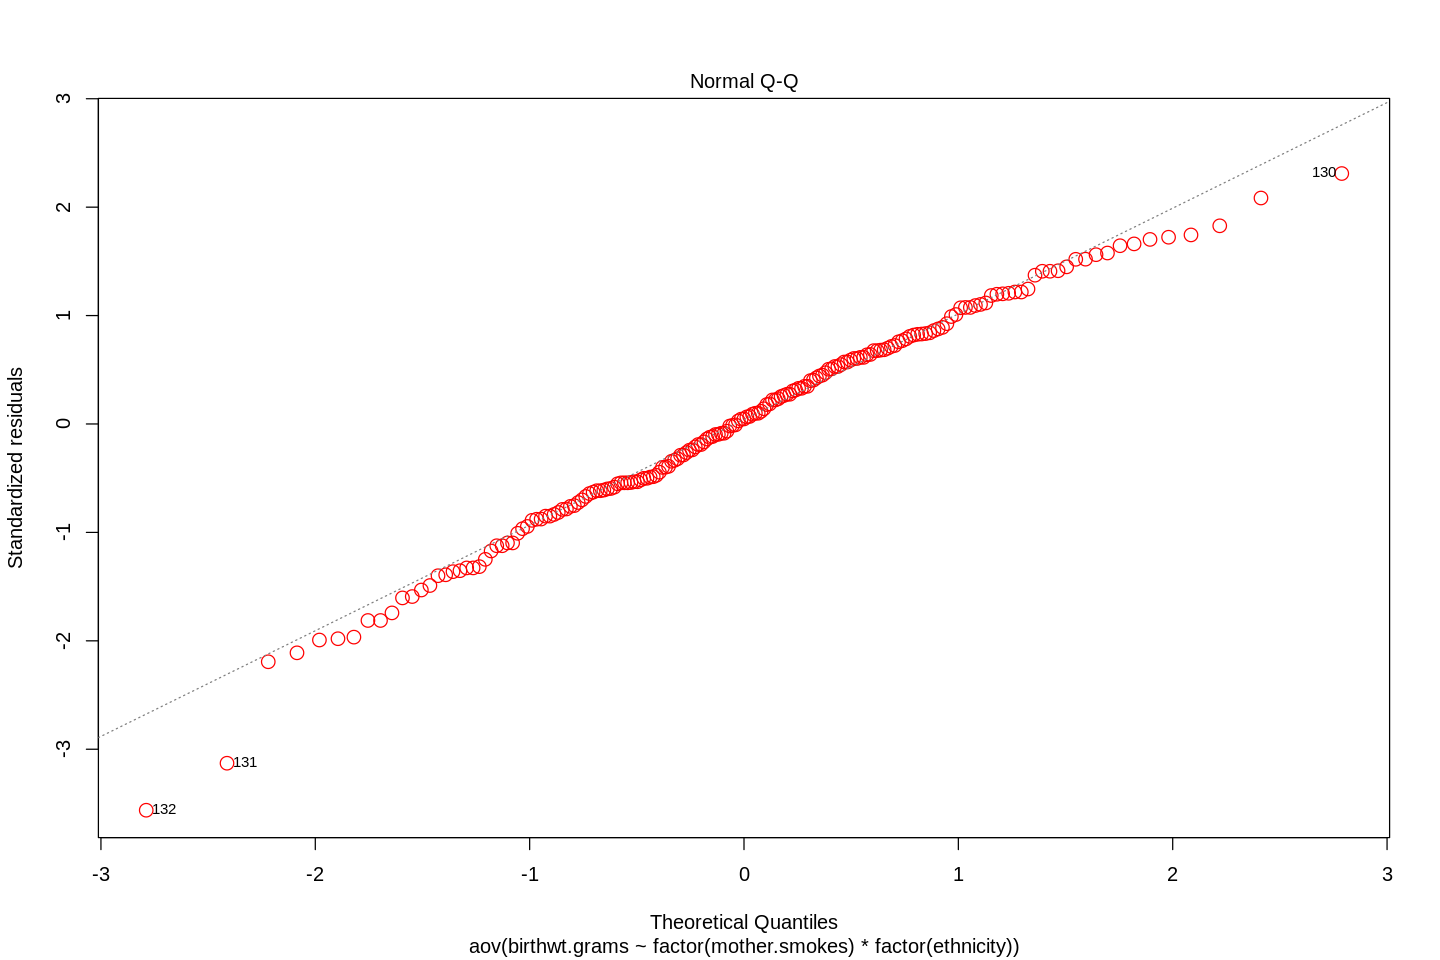

In [41]:
plot(twoWay_anova_interaction, 2, col = "red", cex = 1.5)

Todo paraece correcto, hagamos la prueba Shapiro

In [42]:
aov_residuals <- residuals(object = twoWay_anova_interaction)
shapiro.test(x = aov_residuals)


	Shapiro-Wilk normality test

data:  aov_residuals
W = 0.98836, p-value = 0.1246


Podemos ver que podemos aceptar la hipótesis nula al obtener un valor P de 0.12. Entonces los residuales se distibuyen normal

Exiten distintos tipos de ANOVA. Cuando hay un número desigual de muestras en cada categoría, el tipo III, suma de cuadcrados, método ANOVA es recomendado

In [43]:
Anova(twoWay_anova_interaction, type = 'III')

,Sum Sq,Df,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),517278369,1,1106.774718,1.604050e-79
factor(mother.smokes),8634536,1,18.474553,2.794476e-05
factor(ethnicity),9936861,2,10.630510,4.288463e-05
factor(mother.smokes):factor(ethnicity),2101808,2,2.248526,1.084634e-01
Residuals,85529548,183,NA,NA


#### Volvemos a obtener la misma inforación, cada factor es significativo, pero la interaccción no lo es